In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
import datetime as dt
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori

In [2]:
df = pd.read_excel('Online Retail.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [6]:
len(df)

541909

In [7]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [8]:
df['Date'] = df['InvoiceDate'].dt.date

In [9]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01


In [10]:
df['month_year'] = df['InvoiceDate'].dt.to_period('M')

In [11]:
df['month_year']

0         2010-12
1         2010-12
2         2010-12
3         2010-12
4         2010-12
           ...   
541904    2011-12
541905    2011-12
541906    2011-12
541907    2011-12
541908    2011-12
Name: month_year, Length: 541909, dtype: period[M]

In [12]:
df['month_year'].unique()

<PeriodArray>
['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
 '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12']
Length: 13, dtype: period[M]

In [13]:
df['month_year'] = df['month_year'].apply(lambda x:str(x).replace('-',''))

In [14]:
df['month_year'] = df['month_year'].apply(lambda x:int(x))

In [15]:
df['month_year'].unique()

array([201012, 201101, 201102, 201103, 201104, 201105, 201106, 201107,
       201108, 201109, 201110, 201111, 201112])

In [16]:
# Creating a recency columns with higher number equals to the most recent
def recency(row):
    if row['month_year']>201109:
        val = 4
    elif row['month_year']>201106:
        val = 3
    elif row['month_year'] > 201103:
        val = 2
    elif row['month_year'] >= 201012:
        val = 1
    return val

In [17]:
df['recency'] = df.apply(recency,axis = 1)

In [18]:
df['recency'].unique()

array([1, 2, 3, 4])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Date         541909 non-null  object        
 9   month_year   541909 non-null  int64         
 10  recency      541909 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 45.5+ MB


In [20]:
df.groupby(['CustomerID'])['InvoiceNo'].count()

CustomerID
12346.0      2
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     13
18283.0    756
18287.0     70
Name: InvoiceNo, Length: 4372, dtype: int64

In [21]:
freq = df.groupby(['CustomerID'])['InvoiceNo'].count().reset_index()

In [22]:
freq.sort_values('InvoiceNo',ascending=False)

,CustomerID,InvoiceNo
4042,17841.0,7983
1895,14911.0,5903
1300,14096.0,5128
330,12748.0,4642
1674,14606.0,2782
...,...,...
1318,14119.0,1
1046,13747.0,1
2400,15590.0,1
2379,15562.0,1


In [23]:
freq.describe()

,CustomerID,InvoiceNo
count,4372.000000,4372.000000
mean,15299.677722,93.053294
std,1722.390705,232.471608
min,12346.000000,1.000000
25%,13812.750000,17.000000
50%,15300.500000,42.000000
75%,16778.250000,102.000000
max,18287.000000,7983.000000


In [24]:
def freqency(row):
    if row['InvoiceNo'] <= 17:
        val = 1
    elif row['InvoiceNo'] <= 42:
        val = 2
    elif row['InvoiceNo'] <= 102:
        val = 3 
    else:
        val = 4
    return val

In [25]:
freq['freq_lvl'] = freq.apply(freqency,axis=1)

In [26]:
freq

,CustomerID,InvoiceNo,freq_lvl
0,12346.0,2,1
1,12347.0,182,4
2,12348.0,31,2
3,12349.0,73,3
4,12350.0,17,1
...,...,...,...
4367,18280.0,10,1
4368,18281.0,7,1
4369,18282.0,13,1
4370,18283.0,756,4


In [27]:
mon = df.groupby(['CustomerID'])['UnitPrice'].sum().reset_index()

In [28]:
mon

,CustomerID,UnitPrice
0,12346.0,2.08
1,12347.0,481.21
2,12348.0,178.71
3,12349.0,605.10
4,12350.0,65.30
...,...,...
4367,18280.0,47.65
4368,18281.0,39.36
4369,18282.0,62.68
4370,18283.0,1220.93


In [29]:
mon.describe()

,CustomerID,UnitPrice
count,4372.000000,4372.000000
mean,15299.677722,322.008226
std,1722.390705,1284.783098
min,12346.000000,0.000000
25%,13812.750000,52.865000
50%,15300.500000,130.095000
75%,16778.250000,302.332500
max,18287.000000,41376.330000


In [30]:
def monetary(row):
    if row['UnitPrice'] <= 52:
        val = 1
    elif row['UnitPrice'] <= 130:
        val = 2
    elif row['UnitPrice'] <= 302:
        val = 3
    else:
        val = 4
    return val

In [31]:
mon['Monetary_lvl'] = mon.apply(monetary,axis=1)

In [32]:
mon.head()

,CustomerID,UnitPrice,Monetary_lvl
0,12346.0,2.08,1
1,12347.0,481.21,4
2,12348.0,178.71,3
3,12349.0,605.10,4
4,12350.0,65.30,2


In [33]:
customer_df = pd.merge(freq,mon,on=['CustomerID'],how='left')

In [34]:
customer_df

,CustomerID,InvoiceNo,freq_lvl,UnitPrice,Monetary_lvl
0,12346.0,2,1,2.08,1
1,12347.0,182,4,481.21,4
2,12348.0,31,2,178.71,3
3,12349.0,73,3,605.10,4
4,12350.0,17,1,65.30,2
...,...,...,...,...,...
4367,18280.0,10,1,47.65,1
4368,18281.0,7,1,39.36,1
4369,18282.0,13,1,62.68,2
4370,18283.0,756,4,1220.93,4


In [35]:
rec = df.groupby(['CustomerID'])['recency'].max().reset_index()

In [36]:
customer_df = pd.merge(customer_df,rec,on=['CustomerID'],how='left')

In [37]:
customer_df

,CustomerID,InvoiceNo,freq_lvl,UnitPrice,Monetary_lvl,recency
0,12346.0,2,1,2.08,1,1
1,12347.0,182,4,481.21,4,4
2,12348.0,31,2,178.71,3,3
3,12349.0,73,3,605.10,4,4
4,12350.0,17,1,65.30,2,1
...,...,...,...,...,...,...
4367,18280.0,10,1,47.65,1,1
4368,18281.0,7,1,39.36,1,2
4369,18282.0,13,1,62.68,2,4
4370,18283.0,756,4,1220.93,4,4


In [38]:
customer_df.set_index('CustomerID',inplace = True)
customer_df

,InvoiceNo,freq_lvl,UnitPrice,Monetary_lvl,recency
CustomerID,,,,,
12346.0,2,1,2.08,1,1
12347.0,182,4,481.21,4,4
12348.0,31,2,178.71,3,3
12349.0,73,3,605.10,4,4
12350.0,17,1,65.30,2,1
...,...,...,...,...,...
18280.0,10,1,47.65,1,1
18281.0,7,1,39.36,1,2
18282.0,13,1,62.68,2,4


In [39]:
customer_df.rename(columns={'InvoiceNo':'Invoice_count','UnitPrice':'Total_Price'},inplace=True)

In [40]:
customer_df.head()

,Invoice_count,freq_lvl,Total_Price,Monetary_lvl,recency
CustomerID,,,,,
12346.0,2,1,2.08,1,1
12347.0,182,4,481.21,4,4
12348.0,31,2,178.71,3,3
12349.0,73,3,605.10,4,4
12350.0,17,1,65.30,2,1


In [41]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(customer_df)
    wcss.append(kmeans.inertia_)

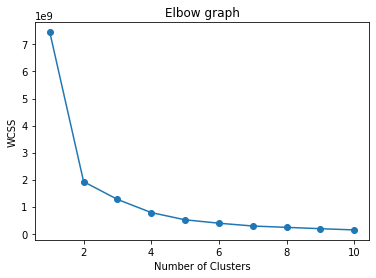

In [42]:
plt.plot(range(1,11),wcss,marker='o')
plt.title('Elbow graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
# Using 4 clusters 
kmeans = KMeans(n_clusters=4,random_state=13)
customer_df['cluster'] = kmeans.fit_predict(customer_df.drop(columns=['Invoice_count','Total_Price']))


In [44]:
customer_df.head()

,Invoice_count,freq_lvl,Total_Price,Monetary_lvl,recency,cluster
CustomerID,,,,,,
12346.0,2,1,2.08,1,1,0
12347.0,182,4,481.21,4,4,2
12348.0,31,2,178.71,3,3,1
12349.0,73,3,605.10,4,4,2
12350.0,17,1,65.30,2,1,0


In [45]:
# Identify each cluster 
round(pd.DataFrame(kmeans.cluster_centers_),1)

,0,1,2
0,1.5,1.6,1.4
1,2.8,2.9,3.6
2,3.9,3.9,3.9
3,1.5,1.5,3.6


In [46]:
# Per the previous functions , cluster 2 is the most valuable group 
VIP = customer_df[customer_df['cluster']==2].reset_index()

In [47]:
VIP.head()

,CustomerID,Invoice_count,freq_lvl,Total_Price,Monetary_lvl,recency,cluster
0,12347.0,182,4,481.21,4,4,2
1,12349.0,73,3,605.10,4,4,2
2,12352.0,95,3,2211.10,4,4,2
3,12357.0,131,4,438.67,4,4,2
4,12359.0,254,4,2225.11,4,4,2


In [48]:
VIP['VIP'] = True

In [49]:
vip = VIP[['CustomerID','VIP']]

In [50]:
# Now that we have the list of vips , let's explore what do they buy the most 
vip_df = pd.merge(df,vip,on='CustomerID',how='left')

In [51]:
vip_df = vip_df[vip_df['VIP']==True]

In [52]:
vip_df['Description'].nunique()

3785

In [53]:
top20 = vip_df['Description'].value_counts().sort_values(ascending=False).head(20).reset_index()

In [54]:
top20.rename(columns={'index':'item','Description':'count'},inplace = True)

In [55]:
top20

,item,count
0,WHITE HANGING HEART T-LIGHT HOLDER,1468
1,REGENCY CAKESTAND 3 TIER,1330
2,JUMBO BAG RED RETROSPOT,1283
3,LUNCH BAG RED RETROSPOT,1115
4,PARTY BUNTING,987
5,ASSORTED COLOUR BIRD ORNAMENT,936
6,SET OF 3 CAKE TINS PANTRY DESIGN,909
7,LUNCH BAG BLACK SKULL.,902
8,LUNCH BAG SPACEBOY DESIGN,812
9,LUNCH BAG CARS BLUE,784


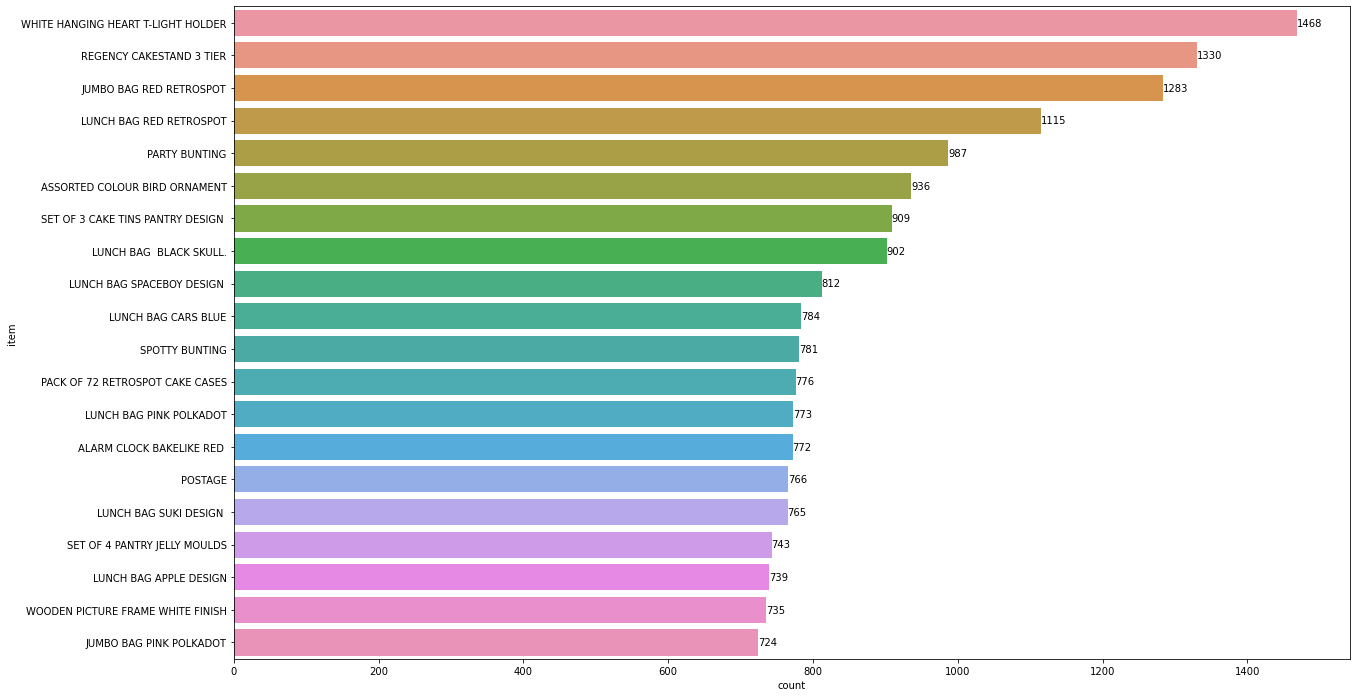

In [56]:
plt.figure(figsize=(20,12))
ax = sns.barplot(y=top20['item'],x=top20['count'],orient='h')
ax.bar_label(ax.containers[0])
plt.show()

In [57]:
# We can also do a cohort analysis

In [58]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,month_year,recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,201012,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,201012,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012,1


In [59]:
def monthly(x):
    return dt.datetime(x.year,x.month,1)

In [60]:
df['BillMonth'] = df['InvoiceDate'].apply(monthly)

In [61]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,month_year,recency,BillMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,201012,1,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012,1,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,201012,1,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012,1,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012,1,2010-12-01


In [62]:
g = df.groupby('CustomerID')['BillMonth']

In [63]:
g.transform('min')

0        2010-12-01
1        2010-12-01
2        2010-12-01
3        2010-12-01
4        2010-12-01
            ...    
541904   2011-08-01
541905   2011-08-01
541906   2011-08-01
541907   2011-08-01
541908   2011-08-01
Name: BillMonth, Length: 541909, dtype: datetime64[ns]

In [64]:
df['CohortMonth'] = g.transform('min')

In [65]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,month_year,recency,BillMonth,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,201112,4,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,201112,4,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,201112,4,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,201112,4,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09,201112,4,2011-12-01,2011-08-01


In [66]:
# getting the difference from the first buying date and the actual buying date
def get_int(df,column):
    year = df[column].dt.year
    month= df[column].dt.month
    return year,month

In [67]:
billYear,billMonth = get_int(df,'BillMonth')
cohortYear,cohortMonth = get_int(df,'CohortMonth')
diffyear = billYear - cohortYear
diffmonth = billMonth-cohortMonth
df['Month'] = diffyear*12+diffmonth+1

In [68]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,month_year,recency,BillMonth,CohortMonth,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,201012,1,2010-12-01,2010-12-01,1.0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012,1,2010-12-01,2010-12-01,1.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,201012,1,2010-12-01,2010-12-01,1.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012,1,2010-12-01,2010-12-01,1.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012,1,2010-12-01,2010-12-01,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-09,201112,4,2011-12-01,2011-08-01,5.0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09,201112,4,2011-12-01,2011-08-01,5.0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,201112,4,2011-12-01,2011-08-01,5.0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09,201112,4,2011-12-01,2011-08-01,5.0


In [69]:
g = df.groupby(['CohortMonth','Month'])
cohortData = g['CustomerID'].apply(pd.Series.nunique).reset_index()
cohortCounts = cohortData.pivot(index='CohortMonth',columns ='Month',values ='CustomerID')
cohortSizes = cohortCounts.iloc[:,0]
retention = cohortCounts.divide(cohortSizes,axis=0)*100
retention.round(2)

Month,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.19,33.44,38.71,35.97,39.66,37.97,35.44,35.44,39.45,37.34,50.00,27.43
2011-01-01,100.0,23.99,28.27,24.23,32.78,29.93,26.13,25.65,31.12,34.68,36.82,14.96,NaN
2011-02-01,100.0,24.74,19.21,27.89,26.84,24.74,25.53,28.16,25.79,31.32,9.21,NaN,NaN
2011-03-01,100.0,19.09,25.45,21.82,23.18,17.73,26.36,23.86,28.86,8.86,NaN,NaN,NaN
2011-04-01,100.0,22.74,22.07,21.07,20.74,23.75,23.08,26.09,8.36,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.66,17.20,17.20,21.51,24.37,26.52,10.39,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.85,18.72,27.23,24.68,33.62,10.21,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.94,20.42,23.04,27.23,11.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.15,25.15,25.15,13.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


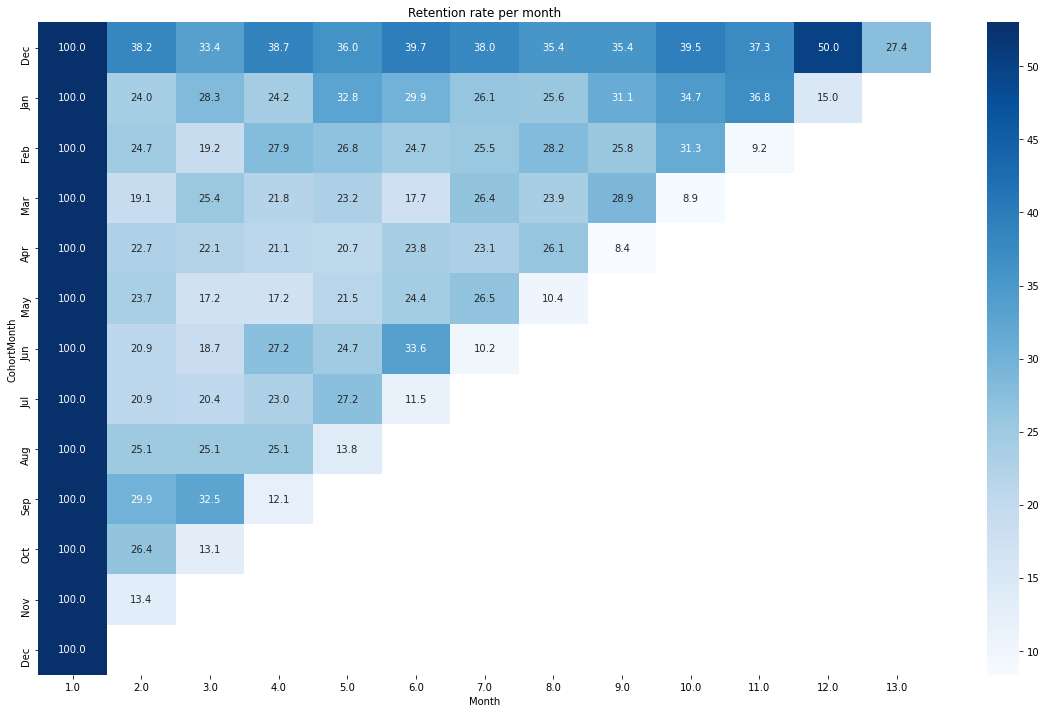

In [70]:
month_list = ['Dec','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
plt.figure(figsize=(20,12))
plt.title('Retention rate per month')
sns.heatmap(retention.round(2),annot = True,cmap = 'Blues',vmax=list(retention.max().sort_values(ascending = False))[1]+3,fmt='.1f',yticklabels=month_list)
plt.show()

In [71]:
# Lets do a basket recommender with mlxtend for the VIP


In [72]:
vip_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,month_year,recency,VIP
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,201012,1,True
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012,1,True
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,201012,1,True
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012,1,True
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,201012,1,True


In [73]:
vip_df['Description'] = vip_df['Description'].str.strip()

In [74]:
vip_df['InvoiceNo'] = vip_df['InvoiceNo'].astype('str')
vip_df = vip_df[~vip_df['InvoiceNo'].str.contains('C')]

In [75]:
basket_fr = vip_df.groupby(['InvoiceNo','Description'])['Quantity'].sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

In [76]:
basket_fr

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581582,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
581584,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
def sum_to_bol(x):
    if x <=0:
        return 0
    else:
        return 1

In [78]:
basket_fr_final = basket_fr.applymap(sum_to_bol)

In [79]:
basket_fr_final.head()

Description,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,12 PENCILS SMALL TUBE RED RETROSPOT,12 PENCILS SMALL TUBE SKULL,...,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
freq_items = apriori(basket_fr_final,min_support=.02,use_colnames=True)

In [81]:
freq_items.sort_values('support',ascending = False).head()

,support,itemsets
274,0.121365,(WHITE HANGING HEART T-LIGHT HOLDER)
115,0.106780,(JUMBO BAG RED RETROSPOT)
210,0.102092,(REGENCY CAKESTAND 3 TIER)
139,0.091675,(LUNCH BAG RED RETROSPOT)
169,0.083341,(PARTY BUNTING)


In [82]:
freq_items

,support,itemsets
0,0.021009,(3 HOOK PHOTO SHELF ANTIQUE WHITE)
1,0.024481,(3 STRIPEY MICE FELTCRAFT)
2,0.021530,(4 TRADITIONAL SPINNING TOPS)
3,0.046705,(6 RIBBONS RUSTIC CHARM)
4,0.023266,(60 CAKE CASES DOLLY GIRL DESIGN)
...,...,...
369,0.023092,"(WOODEN PICTURE FRAME WHITE FINISH, WHITE HANG..."
370,0.033336,"(WOODEN PICTURE FRAME WHITE FINISH, WOODEN FRA..."
371,0.024742,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY..."
372,0.023266,"(LUNCH BAG RED RETROSPOT, LUNCH BAG BLACK SKU..."


In [83]:
a_rules = association_rules(freq_items,metric='lift',min_threshold=.5)
a_rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
160,"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",(PINK REGENCY TEACUP AND SAUCER),0.034291,0.034291,0.024742,0.721519,21.040955,0.023566,3.467773
161,(PINK REGENCY TEACUP AND SAUCER),"(ROSES REGENCY TEACUP AND SAUCER, GREEN REGENC...",0.034291,0.034291,0.024742,0.721519,21.040955,0.023566,3.467773
158,"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",(GREEN REGENCY TEACUP AND SAUCER),0.027954,0.042278,0.024742,0.885093,20.935089,0.023560,8.334770
163,(GREEN REGENCY TEACUP AND SAUCER),"(PINK REGENCY TEACUP AND SAUCER, ROSES REGENCY...",0.042278,0.027954,0.024742,0.585216,20.935089,0.023560,2.343497
21,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.042278,0.034291,0.028388,0.671458,19.581072,0.026938,2.939376
...,...,...,...,...,...,...,...,...,...
154,(WOODEN PICTURE FRAME WHITE FINISH),(WHITE HANGING HEART T-LIGHT HOLDER),0.061550,0.121365,0.023092,0.375176,3.091313,0.015622,1.406213
63,(JUMBO BAG RED RETROSPOT),(LUNCH BAG PINK POLKADOT),0.106780,0.063808,0.020575,0.192683,3.019748,0.013761,1.159634
62,(LUNCH BAG PINK POLKADOT),(JUMBO BAG RED RETROSPOT),0.063808,0.106780,0.020575,0.322449,3.019748,0.013761,1.318306
61,(JUMBO BAG RED RETROSPOT),(LUNCH BAG BLACK SKULL.),0.106780,0.073010,0.020748,0.194309,2.661409,0.012952,1.150553


In [122]:
a_rules['antecedents'] = a_rules['antecedents'].apply(lambda x:list(x)[0])

In [123]:
a_rules[a_rules['antecedents'].isin(top_items)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
147,WHITE HANGING HEART T-LIGHT HOLDER,(RED HANGING HEART T-LIGHT HOLDER),0.121365,0.045403,0.029951,0.246781,5.435319,0.024440,1.267356
155,WHITE HANGING HEART T-LIGHT HOLDER,(WOODEN PICTURE FRAME WHITE FINISH),0.121365,0.061550,0.023092,0.190272,3.091313,0.015622,1.158969
